## Sentiment Analysis on Product Reviews
## Mahnaz Mohammadzamani
## LIU ID: mahmo599

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "D:/Text mining/Project/amazon_reviews.csv" 
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


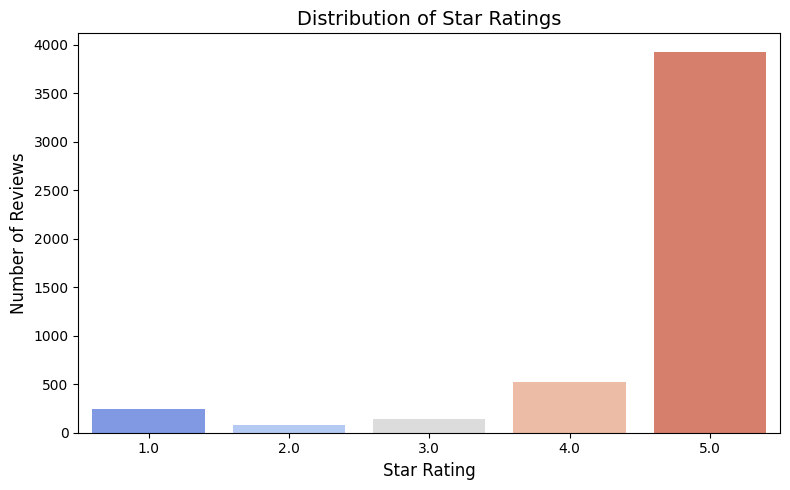

In [3]:
# Count values
rating_counts = df["overall"].value_counts().sort_index()

# Bar plot using the frequency data
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="coolwarm")
# labels and title
plt.title("Distribution of Star Ratings", fontsize=14)
plt.xlabel("Star Rating", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

plt.tight_layout()
plt.show()

In [4]:
import re
import string
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(f"[{string.punctuation}]", "", text)

    doc = nlp(text)
    # Lemmatize and remove stopwords and non-alphabetic tokens
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return " ".join(tokens)

df["cleaned_review"] = df["reviewText"].apply(preprocess_text)

# Convert text into numerical representation using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["cleaned_review"])
# Convert ratings to binary sentiment (Positive = 1, Negative = 0)
y = df["overall"].apply(lambda x: 1 if x > 3 else 0)  

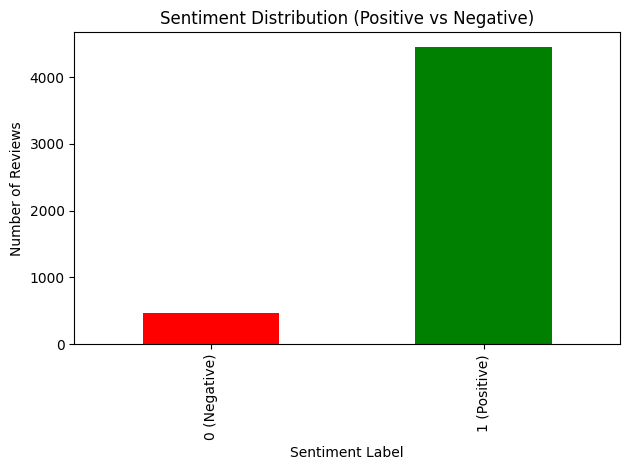

In [5]:
# Count values and plot
colors = ['red', 'green']
y.value_counts().sort_index().plot(kind='bar', color=colors)
plt.xticks([0, 1], ['0 (Negative)', '1 (Positive)'])
plt.title('Sentiment Distribution (Positive vs Negative)')
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment Label')
plt.tight_layout()
plt.savefig("barplot.jpg")
plt.show()

## Logistic Regression, Naïve Bayes, SVM

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models (Logistic Regression,Naïve Bayes and SVM)
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Naïve Bayes": MultinomialNB(),
    "SVM": SVC(kernel="linear")
}

# Train and Evaluate Models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #Print the performance of each model
    print(f"\n{model_name} Performance:")
    print(classification_report(y_test, y_pred))



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.56      0.84      0.67        95
           1       0.98      0.93      0.95       888

    accuracy                           0.92       983
   macro avg       0.77      0.89      0.81       983
weighted avg       0.94      0.92      0.93       983


Naïve Bayes Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.90      1.00      0.95       888

    accuracy                           0.90       983
   macro avg       0.45      0.50      0.47       983
weighted avg       0.82      0.90      0.86       983



C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVM Performance:
              precision    recall  f1-score   support

           0       0.81      0.45      0.58        95
           1       0.94      0.99      0.97       888

    accuracy                           0.94       983
   macro avg       0.88      0.72      0.77       983
weighted avg       0.93      0.94      0.93       983



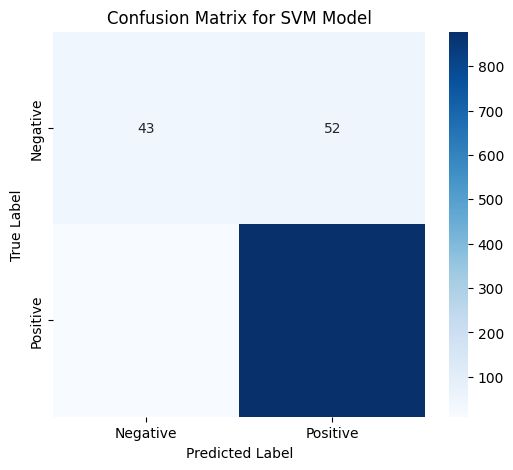

In [7]:
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix for SVM Model(best model)
cm_svm = confusion_matrix(y_test, y_pred)  

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM Model")
plt.savefig("confusion.jpg")
plt.show()


In [8]:
#fit a random baseline 
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_test)
print(dummy_clf.score(y_test, y_pred))
y_pred=dummy_clf.predict(X_test)
performance=classification_report(y_test, y_pred)
print(performance)

0.8748728382502543
              precision    recall  f1-score   support

           0       0.05      0.05      0.05        95
           1       0.90      0.89      0.89       888

    accuracy                           0.81       983
   macro avg       0.47      0.47      0.47       983
weighted avg       0.82      0.81      0.81       983



In [9]:
#fit the most-frequent-class baseline
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_test)
print(dummy_clf.score(y_test, y_pred))
y_pred=dummy_clf.predict(X_test)
performance=classification_report(y_test, y_pred)
print(performance)

0.8972533062054934
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.90      1.00      0.95       888

    accuracy                           0.90       983
   macro avg       0.45      0.50      0.47       983
weighted avg       0.82      0.90      0.86       983



C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
#Determining the minimum number of samples for each party
parties = sorted(y_train.unique())
y_count=y_train.value_counts()
min_y=min(y_count)
sample=[]

# Loop through each unique class
for y in parties:
    # Find all indices for the current class
    y_id = np.where(y_train == y)[0]
    selected_id = np.random.choice(y_id, min_y, replace=False)
    sample.extend(selected_id)

# Shuffle the indices to ensure random distribution
np.random.shuffle(sample)
# Creating the undersampled dataset
undersampled_x_train = X_train[sample]
undersampled_y_train = y_train.iloc[sample]
# Check the balance of the undersampled dataset
print(undersampled_y_train.value_counts())
# Extract features and labels for the undersampled data
X_resampled = undersampled_x_train
y_resampled = undersampled_y_train

0    371
1    371
Name: overall, dtype: int64


In [11]:
# Train and Evaluate Models
for model_name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    #Print the performance of each model
    print(f"\n{model_name} Performance:")
    print(classification_report(y_test, y_pred))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.44      0.89      0.59        95
           1       0.99      0.88      0.93       888

    accuracy                           0.88       983
   macro avg       0.71      0.89      0.76       983
weighted avg       0.93      0.88      0.90       983


Naïve Bayes Performance:
              precision    recall  f1-score   support

           0       0.34      0.92      0.49        95
           1       0.99      0.81      0.89       888

    accuracy                           0.82       983
   macro avg       0.66      0.86      0.69       983
weighted avg       0.93      0.82      0.85       983


SVM Performance:
              precision    recall  f1-score   support

           0       0.43      0.88      0.58        95
           1       0.99      0.87      0.93       888

    accuracy                           0.87       983
   macro avg       0.71      0.88      0.75       

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Define models (Logistic Regression,Naïve Bayes and SVM)
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Naïve Bayes": MultinomialNB(),
    "SVM": SVC(kernel="linear",class_weight='balanced',probability=True)
}

# Train and Evaluate Models
for model_name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    #Print the performance of each model
    print(f"\n{model_name} Performance:")
    print(classification_report(y_test, y_pred))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.61      0.78      0.69        95
           1       0.98      0.95      0.96       888

    accuracy                           0.93       983
   macro avg       0.79      0.86      0.82       983
weighted avg       0.94      0.93      0.93       983


Naïve Bayes Performance:
              precision    recall  f1-score   support

           0       0.44      0.84      0.58        95
           1       0.98      0.89      0.93       888

    accuracy                           0.88       983
   macro avg       0.71      0.86      0.76       983
weighted avg       0.93      0.88      0.90       983


SVM Performance:
              precision    recall  f1-score   support

           0       0.61      0.73      0.66        95
           1       0.97      0.95      0.96       888

    accuracy                           0.93       983
   macro avg       0.79      0.84      0.81       

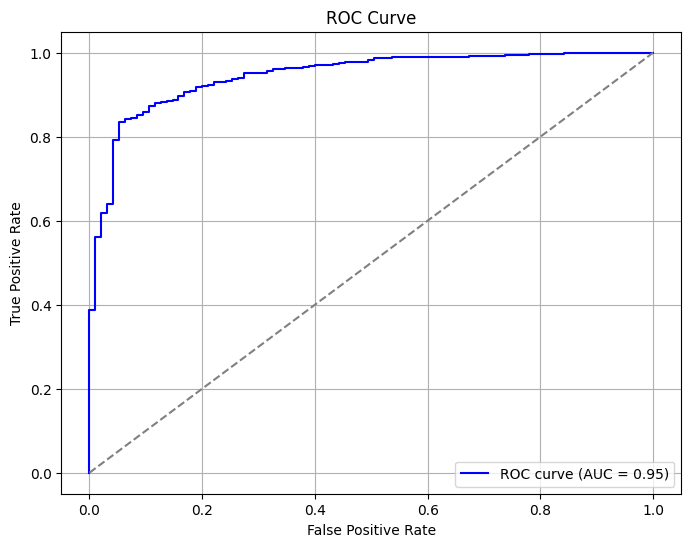

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle='--', color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

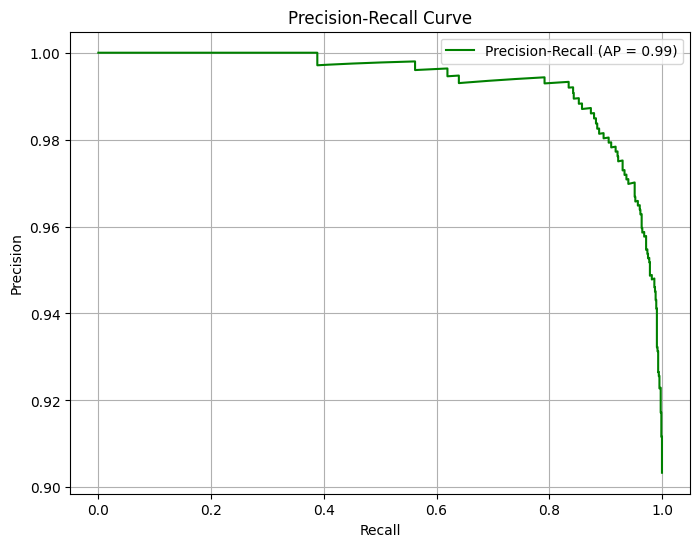

In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall values
precision, recall, _ = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall (AP = {avg_precision:.2f})", color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X = df["cleaned_review"].astype(str)
y = df["overall"].apply(lambda x: 1 if x > 3 else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline
pipe = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("logreg", LogisticRegression())
])

# Hyperparameter grid
parameters = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'logreg__C': [0.2, 1.0, 1.5],
}

# Grid Search
clf = GridSearchCV(pipe, parameters, cv=5)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.34      0.49        95
           1       0.93      1.00      0.96       888

    accuracy                           0.93       983
   macro avg       0.91      0.67      0.73       983
weighted avg       0.93      0.93      0.92       983



In [18]:
# SVM Pipeline
svm_pipe = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("svm", SVC(kernel='linear', class_weight='balanced',probability=True)) 
])

# SVM Hyperparameters
svm_params = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'svm__C': [0.2, 1.0, 1.5],
}

# Grid Search
svm_clf = GridSearchCV(svm_pipe, svm_params, cv=5)
svm_clf.fit(X_train, y_train)

# Evaluate
y_pred_svm = svm_clf.predict(X_test)
print("SVM Results:")
print(classification_report(y_test, y_pred_svm))


SVM Results:
              precision    recall  f1-score   support

           0       0.77      0.66      0.71        95
           1       0.96      0.98      0.97       888

    accuracy                           0.95       983
   macro avg       0.87      0.82      0.84       983
weighted avg       0.95      0.95      0.95       983



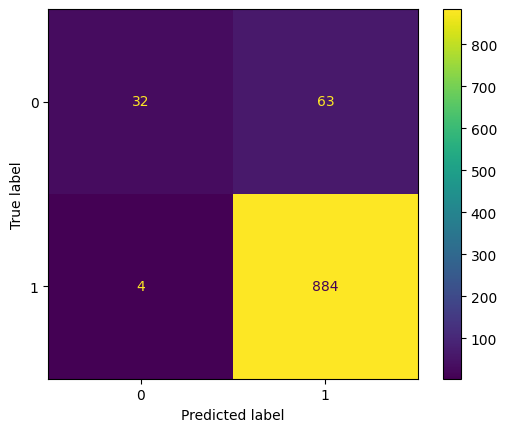

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


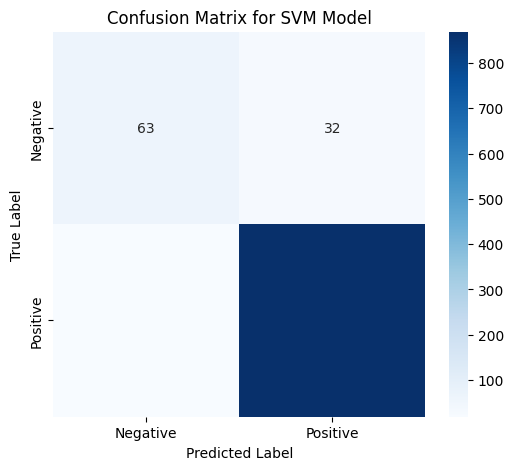

In [22]:
# Compute Confusion Matrix for SVM Model(best model)
cm_svm1 = confusion_matrix(y_test, y_pred_svm)  

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm1, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM Model")
plt.savefig("confusion1.jpg")
plt.show()


In [23]:
from sklearn.naive_bayes import MultinomialNB

# NB Pipeline
nb_pipe = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("nb", MultinomialNB())
])

# NB Hyperparameters
nb_params = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'nb__alpha': [0.5, 1.0, 1.5],  # Smoothing parameter
}

# Grid Search
nb_clf = GridSearchCV(nb_pipe, nb_params, cv=5)
nb_clf.fit(X_train, y_train)

# Evaluate
y_pred_nb = nb_clf.predict(X_test)
print("Naïve Bayes Results:")
print(classification_report(y_test, y_pred_nb))


Naïve Bayes Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.90      1.00      0.95       888

    accuracy                           0.90       983
   macro avg       0.45      0.50      0.47       983
weighted avg       0.82      0.90      0.86       983



C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
from sklearn.naive_bayes import ComplementNB
from sklearn.feature_extraction.text import CountVectorizer
nb_pipe = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("cnb", ComplementNB())
])

nb_params = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'cnb__alpha': [0.1, 0.5, 1.0],
}

nb_clf = GridSearchCV(nb_pipe, nb_params, cv=5)
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)

print("Complement Naïve Bayes Results:")
print(classification_report(y_test, y_pred))


Complement Naïve Bayes Results:
              precision    recall  f1-score   support

           0       0.75      0.44      0.56        95
           1       0.94      0.98      0.96       888

    accuracy                           0.93       983
   macro avg       0.85      0.71      0.76       983
weighted avg       0.92      0.93      0.92       983



In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# Assuming df has columns: 'cleaned_review' and 'overall'
df["label"] = df["overall"].apply(lambda x: 1 if x > 3 else 0)

X = df["cleaned_review"].astype(str)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# TF-IDF + XGBoost Pipeline
xgb_pipe = Pipeline([
    ("vectorizer", TfidfVectorizer(max_features=10000)),
    ("xgb", XGBClassifier(use_label_encoder=False, eval_metric="logloss", scale_pos_weight=len(y[y==0])/len(y[y==1])))
])

# Hyperparameter tuning (optional)
params = {
    "xgb__n_estimators": [100],
    "xgb__max_depth": [4, 6],
    "xgb__learning_rate": [0.1],
}

grid_xgb = GridSearchCV(xgb_pipe, params, cv=3, scoring="f1", verbose=1)
grid_xgb.fit(X_train, y_train)

# Evaluation
y_pred = grid_xgb.predict(X_test)
print("XGBoost Performance:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\mahna\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:21:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mahna\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:21:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mahna\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:21:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mahna\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:21:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.45      0.71      0.55        93
           1       0.97      0.91      0.94       890

    accuracy                           0.89       983
   macro avg       0.71      0.81      0.74       983
weighted avg       0.92      0.89      0.90       983



In [26]:
import lightgbm as lgb

# TF-IDF + LightGBM Pipeline
lgb_pipe = Pipeline([
    ("vectorizer", TfidfVectorizer(max_features=10000)),
    ("lgb", lgb.LGBMClassifier(class_weight="balanced"))  # Handles imbalance
])

# Hyperparameter tuning (optional)
params_lgb = {
    "lgb__n_estimators": [100],
    "lgb__max_depth": [4, 6],
    "lgb__learning_rate": [0.1],
}

grid_lgb = GridSearchCV(lgb_pipe, params_lgb, cv=3, scoring="f1", verbose=1)
grid_lgb.fit(X_train, y_train)

# Evaluation
y_pred_lgb = grid_lgb.predict(X_test)
print("LightGBM Performance:")
print(classification_report(y_test, y_pred_lgb))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[LightGBM] [Info] Number of positive: 2372, number of negative: 249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12347
[LightGBM] [Info] Number of data points in the train set: 2621, number of used features: 400
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2373, number of negative: 248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12040
[LightGBM] [Info] Number of data points in the train set: 2621, number of used features: 379
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2373, number of negative: 249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12296
[LightGBM] [Info] Number of data points in the train set: 2622, number of used features: 396
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2372, number of negative: 249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12347
[LightGBM] [Info] Number of data points in the train set: 2621, number of used features: 400
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2373, number of negative: 248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12040
[LightGBM] [Info] Number of data points in the train set: 2621, number of used features: 379
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2373, number of negative: 249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12296
[LightGBM] [Info] Number of data points in the train set: 2622, number of used features: 396
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 3559, number of negative: 373
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18766
[LightGBM] [Info] Number of data points in the train set: 3932, number of used features: 530
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## LSTM Model

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df["cleaned_review"])
X_seq = tokenizer.texts_to_sequences(df["cleaned_review"])
X_pad = pad_sequences(X_seq, maxlen=200)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Define LSTM Model
model_lstm = Sequential([
    Embedding(5000, 100, input_length=200),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation="sigmoid")
])

# Compile Model
model_lstm.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train Model
model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5


C:\Users\mahna\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


123/123 ━━━━━━━━━━━━━━━━━━━━ 27s 160ms/step - accuracy: 0.8883 - loss: 0.3992 - val_accuracy: 0.9044 - val_loss: 0.2340
Epoch 2/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - accuracy: 0.9247 - loss: 0.2138 - val_accuracy: 0.9308 - val_loss: 0.1857
Epoch 3/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 26s 212ms/step - accuracy: 0.9541 - loss: 0.1372 - val_accuracy: 0.9329 - val_loss: 0.1959
Epoch 4/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 24s 196ms/step - accuracy: 0.9658 - loss: 0.1023 - val_accuracy: 0.9329 - val_loss: 0.2226
Epoch 5/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 205ms/step - accuracy: 0.9737 - loss: 0.0751 - val_accuracy: 0.9247 - val_loss: 0.2410


In [28]:
# Get predicted probabilities
y_pred_prob = model_lstm.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step
              precision    recall  f1-score   support

           0       0.66      0.46      0.54        95
           1       0.94      0.97      0.96       888

    accuracy                           0.92       983
   macro avg       0.80      0.72      0.75       983
weighted avg       0.92      0.92      0.92       983



In [29]:
# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df["cleaned_review"])
X_seq = tokenizer.texts_to_sequences(df["cleaned_review"])
X_pad = pad_sequences(X_seq, maxlen=200)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Define LSTM Model
model = Sequential([
    Embedding(10000, 100, input_length=200),
    SpatialDropout1D(0.2),
    LSTM(100, return_sequences=True),
    LSTM(64),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])


# Compile Model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train Model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5


C:\Users\mahna\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 152ms/step - accuracy: 0.8986 - loss: 0.3418 - val_accuracy: 0.9278 - val_loss: 0.1977
Epoch 2/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 19s 152ms/step - accuracy: 0.9460 - loss: 0.1749 - val_accuracy: 0.9379 - val_loss: 0.1859
Epoch 3/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 22s 182ms/step - accuracy: 0.9656 - loss: 0.1048 - val_accuracy: 0.9207 - val_loss: 0.2286
Epoch 4/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.9766 - loss: 0.0785 - val_accuracy: 0.9227 - val_loss: 0.2703
Epoch 5/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 23s 184ms/step - accuracy: 0.9875 - loss: 0.0419 - val_accuracy: 0.9135 - val_loss: 0.3173


In [30]:
# Get predicted probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
              precision    recall  f1-score   support

           0       0.57      0.45      0.50        95
           1       0.94      0.96      0.95       888

    accuracy                           0.91       983
   macro avg       0.75      0.71      0.73       983
weighted avg       0.91      0.91      0.91       983



In [31]:
from tensorflow.keras.layers import Bidirectional
# Define LSTM Model
model = Sequential([
    Embedding(10000, 100, input_length=200),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)),
    Dense(1, activation="sigmoid")
])

# Compile Model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train Model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5


C:\Users\mahna\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


123/123 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.8976 - loss: 0.3579 - val_accuracy: 0.9095 - val_loss: 0.2160
Epoch 2/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.9411 - loss: 0.1723 - val_accuracy: 0.9349 - val_loss: 0.1921
Epoch 3/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.9565 - loss: 0.1283 - val_accuracy: 0.9329 - val_loss: 0.1960
Epoch 4/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9722 - loss: 0.0839 - val_accuracy: 0.9318 - val_loss: 0.2443
Epoch 5/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.9830 - loss: 0.0592 - val_accuracy: 0.9135 - val_loss: 0.2727


In [32]:
# Get predicted probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))

31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step
              precision    recall  f1-score   support

           0       0.55      0.59      0.57        95
           1       0.96      0.95      0.95       888

    accuracy                           0.91       983
   macro avg       0.75      0.77      0.76       983
weighted avg       0.92      0.91      0.91       983



In [33]:
from collections import Counter

nlp = spacy.load("en_core_web_sm")
# Increase the limit (2 million characters)
nlp.max_length = 2_000_000  

# Combine all reviews
all_text = " ".join(df["reviewText"].dropna().astype(str))

# Process the text
doc = nlp(all_text)

# Extract lemmatized tokens (alphabetic and not stopwords)
tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

# Count word frequency
word_freq = Counter(tokens)

# Show top 20 most frequent words
print(word_freq.most_common(20))


[('card', 5604), ('work', 2790), ('phone', 1957), ('gb', 1703), ('great', 1480), ('buy', 1414), ('memory', 1385), ('sandisk', 1328), ('sd', 1239), ('fast', 1200), ('use', 1155), ('good', 1088), ('galaxy', 1023), ('price', 961), ('speed', 952), ('problem', 864), ('samsung', 840), ('storage', 773), ('tablet', 758), ('video', 743)]


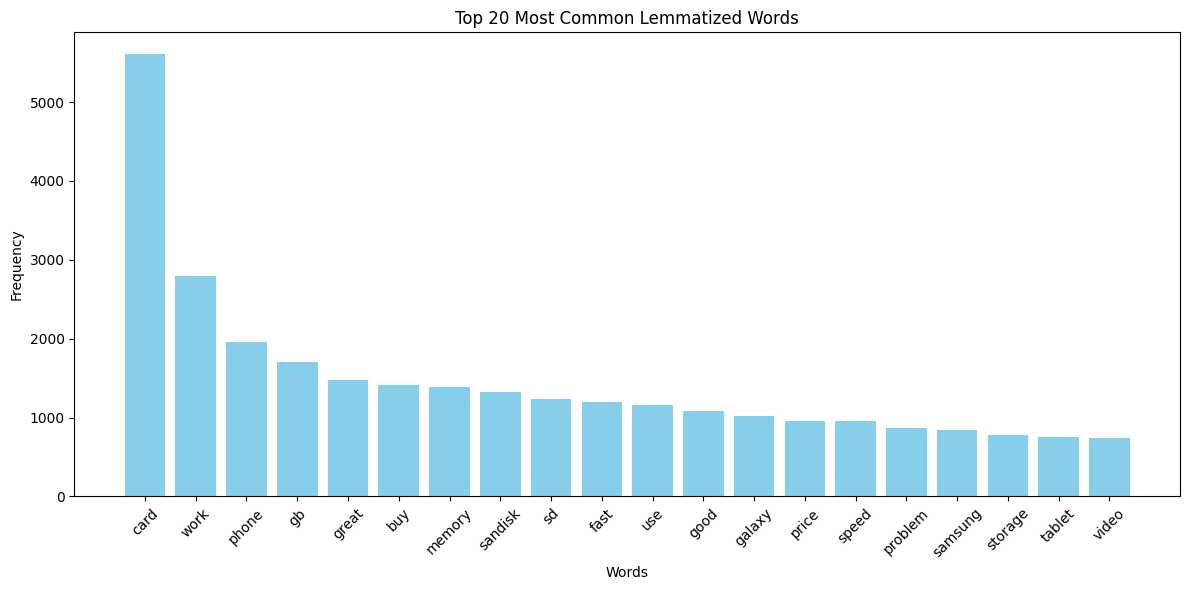

In [34]:
common_words = word_freq.most_common(20)

# Separate words and counts for plotting
words, counts = zip(*common_words)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Lemmatized Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("mostcommon.jpg")
plt.show()


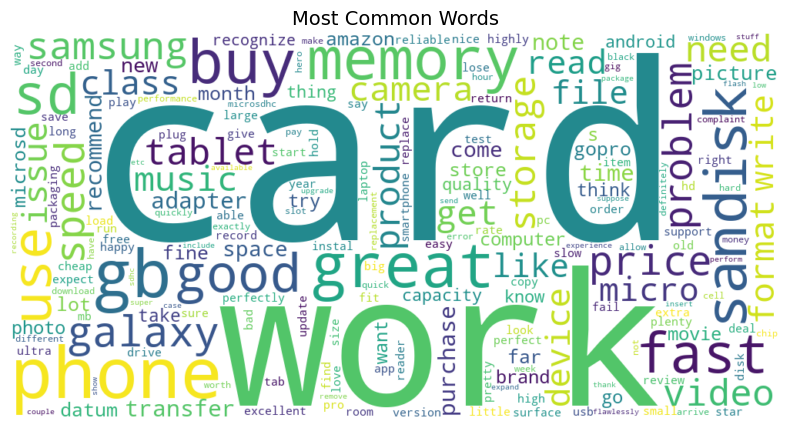

In [35]:
# Generate the word cloud from frequencies
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words", fontsize=14)
plt.savefig("most_common.jpg")
plt.show()


## Full BERT Fine-Tuning model

In [2]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset

# Load your data
df = df.dropna(subset=["reviewText"])
df["label"] = df["overall"].apply(lambda x: 1 if x > 3 else 0)

# Train/test split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["reviewText"].tolist(),
    df["label"].tolist(),
    test_size=0.2,
    random_state=42
)

# Tokenization
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [3]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_dict({"text": train_texts, "label": train_labels})
test_dataset = Dataset.from_dict({"text": test_texts, "label": test_labels})

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

Map:   0%|          | 0/3931 [00:00<?, ? examples/s]

Map:   0%|          | 0/983 [00:00<?, ? examples/s]

In [5]:
# Load pre-trained BERT with classification head
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:

#  Define metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

#  Training setup
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)

#  Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

#  Train the model
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.188100,0.162028,0.951170,0.969061,0.977703,0.973363
2,0.126900,0.144450,0.957274,0.971334,0.982163,0.976718
3,0.030300,0.178425,0.957274,0.976589,0.976589,0.976589


TrainOutput(global_step=738, training_loss=0.1352830315993084, metrics={'train_runtime': 13727.1423, 'train_samples_per_second': 0.859, 'train_steps_per_second': 0.054, 'total_flos': 775717168965120.0, 'train_loss': 0.1352830315993084, 'epoch': 3.0})

In [8]:
# 9) Evaluate & Confusion Matrix -------------------------------
#eval_res = trainer.evaluate()
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
#  Final evaluation
eval_results = trainer.evaluate()
print("Eval metrics:", eval_results)

preds = trainer.predict(test_dataset)
y_true = preds.label_ids
y_pred = preds.predictions.argmax(-1)

print("\nClassification report (per class):")
print(classification_report(y_true, y_pred, digits=3))

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
print("\nConfusion Matrix (rows=true, cols=pred):\n", cm)

Eval metrics: {'eval_loss': 0.14445023238658905, 'eval_accuracy': 0.9572736520854527, 'eval_precision': 0.9713340683572216, 'eval_recall': 0.9821627647714605, 'eval_f1': 0.9767184035476718, 'eval_runtime': 438.3023, 'eval_samples_per_second': 2.243, 'eval_steps_per_second': 0.037, 'epoch': 3.0}

Classification report (per class):
              precision    recall  f1-score   support

           0      0.789     0.698     0.741        86
           1      0.971     0.982     0.977       897

    accuracy                          0.957       983
   macro avg      0.880     0.840     0.859       983
weighted avg      0.955     0.957     0.956       983


Confusion Matrix (rows=true, cols=pred):
 [[ 60  26]
 [ 16 881]]


<Figure size 600x600 with 0 Axes>

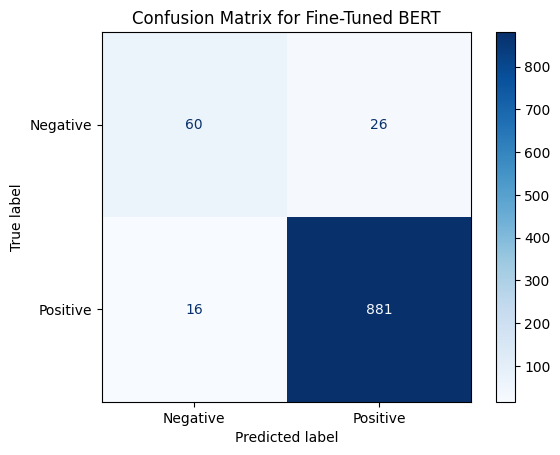

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predictions = trainer.predict(test_dataset)
y_true = predictions.label_ids
y_pred = predictions.predictions.argmax(-1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

# Plot
plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Fine-Tuned BERT")
plt.show()


## Bert Tiny model 

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel

# Load bert-tiny tokenizer and model
model_name = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)

# Function to extract BERT embeddings
def extract_bert_embeddings(text):
    tokens = tokenizer(text, padding=True, truncation=True, max_length=200, return_tensors="pt")
    with torch.no_grad():
        output = bert_model(**tokens)
        # Mean pooling over token embeddings
    return output.last_hidden_state.mean(dim=1)  

df["cleaned_review"] = df["reviewText"].astype(str).apply(lambda x: extract_bert_embeddings(x))

# Convert embeddings to tensor format
X_bert = torch.stack(df["cleaned_review"].tolist()).squeeze(1)  
# Convert labels
y = torch.tensor(df["overall"].apply(lambda x: 1 if x > 3 else 0).values, dtype=torch.float32)  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape)  



C:\Users\mahna\anaconda3\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


X_train shape: torch.Size([3932, 128])
X_test shape: torch.Size([983, 128])


In [29]:
# Define PyTorch sentiment classifier
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SentimentClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, 1)  

    def forward(self, x):
        x = self.fc(x)
        # sigmoid for binary classification
        return torch.sigmoid(x)  


# Get embedding dimension
input_dim = X_train.shape[1]  
model_tiny = SentimentClassifier(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model_tiny.parameters(), lr=0.01)

# Train Model
num_epochs = 5
for epoch in range(num_epochs):
    model_tiny.train()
    optimizer.zero_grad()
    outputs = model_tiny(X_train).squeeze()
    loss = criterion(outputs, y_train) 
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

Epoch 1/5, Loss: 0.7321194410324097
Epoch 2/5, Loss: 0.46740710735321045
Epoch 3/5, Loss: 0.34721389412879944
Epoch 4/5, Loss: 0.3149280548095703
Epoch 5/5, Loss: 0.3211425542831421


In [30]:
# Evaluate Model
model_tiny.eval()
with torch.no_grad():
    y_pred = model_tiny(X_test).squeeze()
    y_pred = (y_pred > 0.5).int()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        95
         1.0       0.90      1.00      0.95       888

    accuracy                           0.90       983
   macro avg       0.45      0.50      0.47       983
weighted avg       0.82      0.90      0.86       983



C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
# Define PyTorch sentiment classifier
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SentimentClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, 1)  

    def forward(self, x):
        x = self.fc(x)
        # sigmoid for binary classification
        return torch.sigmoid(x)  

# Initialize model

input_dim = X_train.shape[1]  
model_tiny = SentimentClassifier(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model_tiny.parameters(), lr=0.01, momentum=0.9)

# Train Model
num_epochs = 5
for epoch in range(num_epochs):
    model_tiny.train()
    optimizer.zero_grad()
    outputs = model_tiny(X_train).squeeze()
    loss = criterion(outputs, y_train)  
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

Epoch 1/5, Loss: 0.382994145154953
Epoch 2/5, Loss: 0.3651770353317261
Epoch 3/5, Loss: 0.3403892517089844
Epoch 4/5, Loss: 0.31956714391708374
Epoch 5/5, Loss: 0.30788230895996094


In [32]:
# Evaluate Model
model_tiny.eval()
with torch.no_grad():
    y_pred = model_tiny(X_test).squeeze()
    y_pred = (y_pred > 0.5).int()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        95
         1.0       0.90      1.00      0.95       888

    accuracy                           0.90       983
   macro avg       0.45      0.50      0.47       983
weighted avg       0.82      0.90      0.86       983



C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import numpy as np

from sklearn.utils.class_weight import compute_class_weight
import torch.nn as nn
from transformers import Trainer

# 1) Prepare labels
df = df.dropna(subset=["reviewText"]).copy()
df["label"] = (df["overall"] > 3).astype(int)

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["reviewText"].tolist(), df["label"].tolist(), test_size=0.2, random_state=42, stratify=df["label"]
)

# 2) Tokenizer (model-matched WordPiece)
model_id = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(model_id)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)

# 3) Hugging Face Datasets
train_ds = Dataset.from_dict({"text": train_texts, "label": train_labels})
test_ds  = Dataset.from_dict({"text": test_texts,  "label": test_labels})

train_ds = train_ds.map(tokenize_function, batched=True)
test_ds  = test_ds.map(tokenize_function,  batched=True)

train_ds = train_ds.remove_columns(["text"]).with_format("torch")
test_ds  = test_ds.remove_columns(["text"]).with_format("torch")

# 4) Model: Sequence classification head on BERT-Tiny (num_labels=2)
model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=2)

Map:   0%|          | 0/3931 [00:00<?, ? examples/s]

Map:   0%|          | 0/983 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 1) Class-weighted loss

In [10]:

# 5) Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(-1)
    acc = accuracy_score(labels, preds)
    p, r, f1, _ = precision_recall_fscore_support(labels, preds, average="binary", zero_division=0)
    # also report macro to see minority-class health
    mp, mr, mf1, _ = precision_recall_fscore_support(labels, preds, average="macro", zero_division=0)
    return {"accuracy": acc, "precision": p, "recall": r, "f1": f1,
            "macro_precision": mp, "macro_recall": mr, "macro_f1": mf1}

# 6) Training arguments
args = TrainingArguments(
    output_dir="bert_tiny_results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    learning_rate=3e-5,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    logging_steps=50
)
# Pull integer labels out of the HF Datasets
y_train_int = np.array(train_ds["label"])  # or train_ds["labels"] if you named it that
y_test_int   = np.array(test_ds["label"])    # optional, for checks


# y_train_int: list/array of int labels (0/1) from your train split
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.array([0,1]),
    y=np.array(y_train_int)
)
class_weights = torch.tensor(class_weights, dtype=torch.float)

class WeightedTrainer(Trainer):
    def __init__(self, *args, class_weights=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        # Pull out labels and run forward pass
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        # Weighted CE loss
        loss_fct = nn.CrossEntropyLoss(weight=self.class_weights.to(logits.device))
        loss = loss_fct(logits, labels)

        if return_outputs:
            return loss, outputs
        return loss





# 7) Trainer
trainer = WeightedTrainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
    class_weights=class_weights,
)

# 8) Fine-tune
trainer.train()


C:\Users\mahna\anaconda3\Lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Macro Precision,Macro Recall,Macro F1
1,0.625500,0.590838,0.830112,0.952441,0.855056,0.901125,0.625677,0.723227,0.649118
2,0.554900,0.525206,0.813835,0.966975,0.822472,0.888889,0.633930,0.776827,0.657611
3,0.486800,0.510914,0.844354,0.961202,0.862921,0.909414,0.649079,0.764794,0.678534


TrainOutput(global_step=738, training_loss=0.5791813765114885, metrics={'train_runtime': 103.3452, 'train_samples_per_second': 114.113, 'train_steps_per_second': 7.141, 'total_flos': 3745713415680.0, 'train_loss': 0.5791813765114885, 'epoch': 3.0})

In [11]:


# 9) Evaluate + human-readable report
eval_res = trainer.evaluate()
print(eval_res)

preds = trainer.predict(test_ds)
y_true = preds.label_ids
y_pred = preds.predictions.argmax(-1)
print(classification_report(y_true, y_pred, digits=3))

# 10) Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
print("Confusion Matrix (rows=true, cols=pred):\n", cm)


{'eval_loss': 0.5109140276908875, 'eval_accuracy': 0.844354018311292, 'eval_precision': 0.9612015018773467, 'eval_recall': 0.8629213483146068, 'eval_f1': 0.9094138543516874, 'eval_macro_precision': 0.6490790118082386, 'eval_macro_recall': 0.7647940074906368, 'eval_macro_f1': 0.6785336419772877, 'eval_runtime': 2.181, 'eval_samples_per_second': 450.72, 'eval_steps_per_second': 7.336, 'epoch': 3.0}
              precision    recall  f1-score   support

           0      0.337     0.667     0.448        93
           1      0.961     0.863     0.909       890

    accuracy                          0.844       983
   macro avg      0.649     0.765     0.679       983
weighted avg      0.902     0.844     0.866       983

Confusion Matrix (rows=true, cols=pred):
 [[ 62  31]
 [122 768]]


## 2) Weighted sampling (balances each batch)

In [12]:
import torch
from torch.utils.data import WeightedRandomSampler

# Build per-example weights for the training set
labels_np = np.array(y_train_int)
w0, w1 = class_weights.numpy()   # from compute_class_weight above
example_weights = np.where(labels_np == 0, w0, w1)
sampler = WeightedRandomSampler(weights=example_weights, num_samples=len(example_weights), replacement=True)

# Use a custom Trainer that injects the sampler
from torch.utils.data import DataLoader
from transformers import default_data_collator

class SamplerTrainer(Trainer):
    def get_train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            batch_size=self.args.train_batch_size,
            sampler=sampler,
            collate_fn=default_data_collator
        )

trainer = SamplerTrainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Macro Precision,Macro Recall,Macro F1
1,0.410600,0.386012,0.840285,0.981603,0.839326,0.904906,0.668730,0.844394,0.703247
2,0.353300,0.331383,0.871821,0.979899,0.876404,0.925267,0.695832,0.852181,0.737633
3,0.310600,0.318321,0.876907,0.980025,0.882022,0.928445,0.701551,0.854990,0.744222


TrainOutput(global_step=738, training_loss=0.37244382847938434, metrics={'train_runtime': 107.8283, 'train_samples_per_second': 109.368, 'train_steps_per_second': 6.844, 'total_flos': 3745713415680.0, 'train_loss': 0.37244382847938434, 'epoch': 3.0})

In [13]:
# 9) Evaluate + human-readable report
eval_res = trainer.evaluate()
print(eval_res)

preds = trainer.predict(test_ds)
y_true = preds.label_ids
y_pred = preds.predictions.argmax(-1)
print(classification_report(y_true, y_pred, digits=3))

# 10) Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
print("Confusion Matrix (rows=true, cols=pred):\n", cm)

{'eval_loss': 0.3183213770389557, 'eval_accuracy': 0.8769074262461851, 'eval_precision': 0.9800249687890137, 'eval_recall': 0.8820224719101124, 'eval_f1': 0.9284447072738025, 'eval_macro_precision': 0.7015509459329684, 'eval_macro_recall': 0.8549897305787122, 'eval_macro_f1': 0.7442223536369013, 'eval_runtime': 2.1075, 'eval_samples_per_second': 466.431, 'eval_steps_per_second': 7.592, 'epoch': 3.0}
              precision    recall  f1-score   support

           0      0.423     0.828     0.560        93
           1      0.980     0.882     0.928       890

    accuracy                          0.877       983
   macro avg      0.702     0.855     0.744       983
weighted avg      0.927     0.877     0.894       983

Confusion Matrix (rows=true, cols=pred):
 [[ 77  16]
 [105 785]]


## Distilbert-base-uncased model

In [33]:
# Choose BERT model
model_name = "distilbert-base-uncased"  
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bert_model = bert_model.to(device)
bert_model.eval()
# Function to extract BERT embeddings using [CLS] token
def extract_bert_embeddings(text):
    tokens = tokenizer(text, padding=True, truncation=True, max_length=200, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = bert_model(**tokens)

    if "distilbert" in model_name:
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # DistilBERT CLS
    else:
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # BERT CLS 
    
    return cls_embedding.squeeze(0).cpu()

# Apply embedding extraction to text
df["cleaned_review"] = df["reviewText"].astype(str).apply(lambda x: extract_bert_embeddings(x))

# Stack embeddings
X_bert = torch.stack(df["cleaned_review"].tolist())
y = torch.tensor(df["overall"].apply(lambda x: 1 if x > 3 else 0).values, dtype=torch.float32)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: torch.Size([3932, 768])
X_test shape: torch.Size([983, 768])


In [34]:
# Define PyTorch sentiment classifier
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SentimentClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, 1) 

    def forward(self, x):
        x = self.fc(x)
        return torch.sigmoid(x)

# Initialize model
input_dim = X_train.shape[1]  
model = SentimentClassifier(input_dim).to(device)

# Move data to device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)  

# Train Model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_train).squeeze()             
    loss = criterion(outputs, y_train)            
    
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 1/5, Loss: 0.7506
Epoch 2/5, Loss: 0.6844
Epoch 3/5, Loss: 0.6248
Epoch 4/5, Loss: 0.5717
Epoch 5/5, Loss: 0.5250


In [35]:
# Put model in evaluation mode
model.eval()

# Disable gradient calculations
with torch.no_grad():
    outputs = model(X_test).squeeze()  
    # Convert to binary labels
    predictions = (outputs > 0.5).int()            

# Move data back to CPU for sklearn
y_true = y_test.cpu().numpy()
y_pred = predictions.cpu().numpy()

# Print evaluation metrics
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        95
         1.0       0.90      1.00      0.95       888

    accuracy                           0.90       983
   macro avg       0.45      0.50      0.47       983
weighted avg       0.82      0.90      0.86       983



C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Fine tunned

In [14]:
# === Setup ===
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight

from transformers import (
    AutoTokenizer,
    AutoConfig,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
)
from datasets import Dataset

# 1) Load your dataframe --------------------------------------
# df must have columns: "reviewText" (str) and "overall" (1-5 rating)
# Example:
# df = pd.read_csv("your_data.csv")
df = df.dropna(subset=["reviewText"]).copy()
df["label"] = (df["overall"] > 3).astype(int)  # 1 = positive, 0 = negative

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["reviewText"].tolist(),
    df["label"].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df["label"].tolist()
)

# 2) Tokenizer & HF Datasets ----------------------------------
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    # returns dict with input_ids and attention_mask
    return tokenizer(
        examples["text"],
        padding="max_length",
        truncation=True,
        max_length=128
    )

train_ds = Dataset.from_dict({"text": train_texts, "label": train_labels})
test_ds  = Dataset.from_dict({"text": test_texts,  "label": test_labels})

train_ds = train_ds.map(tokenize_function, batched=True)
test_ds  = test_ds.map(tokenize_function,  batched=True)

# HF expects column name "labels"
train_ds = train_ds.rename_column("label", "labels")
test_ds  = test_ds.rename_column("label",  "labels")

# set tensor format
train_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_ds.set_format(type="torch",  columns=["input_ids", "attention_mask", "labels"])

Map:   0%|          | 0/3931 [00:00<?, ? examples/s]

Map:   0%|          | 0/983 [00:00<?, ? examples/s]

In [15]:


# 3) Model -----------------------------------------------------
config = AutoConfig.from_pretrained(model_name, num_labels=2)
model = AutoModelForSequenceClassification.from_pretrained(model_name, config=config)

# 4) Class weights for imbalance 
y_train_int = np.array(train_labels, dtype=int)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.array([0, 1]),
    y=y_train_int
)
class_weights = torch.tensor(class_weights, dtype=torch.float)

# 5) Metrics ---------------------------------------------------
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(-1)
    acc = accuracy_score(labels, preds)
    p, r, f1, _ = precision_recall_fscore_support(labels, preds, average="macro", zero_division=0)
    # negative class metrics for the imbalanced case
    p_c, r_c, f1_c, _ = precision_recall_fscore_support(labels, preds, average=None, zero_division=0)
    return {
        "accuracy": acc,
        "macro_precision": p,
        "macro_recall": r,
        "macro_f1": f1,
        "neg_precision": float(p_c[0]),
        "neg_recall": float(r_c[0]),
        "neg_f1": float(f1_c[0]),
    }

# 6) Weighted Trainer to inject class weights ------------------
class WeightedTrainer(Trainer):
    def __init__(self, *args, class_weights=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = nn.CrossEntropyLoss(weight=self.class_weights.to(logits.device))
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

# 7) Training args ---------------------------------------------
training_args = TrainingArguments(
    output_dir="./distilbert_results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    num_train_epochs=3,                 # try 3–5
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    learning_rate=3e-5,
    weight_decay=0.01,
    warmup_ratio=0.1,
    logging_steps=50,
)

# 8) Train -----------------------------------------------------
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
    class_weights=class_weights,
)
trainer.train()



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\mahna\anaconda3\Lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Macro Precision,Macro Recall,Macro F1,Neg Precision,Neg Recall,Neg F1
1,0.401500,0.283896,0.936928,0.803706,0.888136,0.838767,0.626016,0.827957,0.712963
2,0.205700,0.506989,0.954222,0.875042,0.849541,0.861711,0.779070,0.720430,0.748603
3,0.126700,0.665283,0.952187,0.887254,0.814715,0.846219,0.810811,0.645161,0.718563


TrainOutput(global_step=738, training_loss=0.2999575755137415, metrics={'train_runtime': 3866.9374, 'train_samples_per_second': 3.05, 'train_steps_per_second': 0.191, 'total_flos': 390547008087552.0, 'train_loss': 0.2999575755137415, 'epoch': 3.0})

In [16]:
# 9) Evaluate & Confusion Matrix -------------------------------
eval_res = trainer.evaluate()
print("Eval metrics:", eval_res)

preds = trainer.predict(test_ds)
y_true = preds.label_ids
y_pred = preds.predictions.argmax(-1)

print("\nClassification report (per class):")
print(classification_report(y_true, y_pred, digits=3))

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
print("\nConfusion Matrix (rows=true, cols=pred):\n", cm)


Eval metrics: {'eval_loss': 0.5069885849952698, 'eval_accuracy': 0.9542217700915565, 'eval_macro_precision': 0.8750421300977418, 'eval_macro_recall': 0.8495408964600701, 'eval_macro_f1': 0.8617107414505132, 'eval_neg_precision': 0.7790697674418605, 'eval_neg_recall': 0.7204301075268817, 'eval_neg_f1': 0.7486033519553073, 'eval_runtime': 81.1509, 'eval_samples_per_second': 12.113, 'eval_steps_per_second': 0.197, 'epoch': 3.0}

Classification report (per class):
              precision    recall  f1-score   support

           0      0.779     0.720     0.749        93
           1      0.971     0.979     0.975       890

    accuracy                          0.954       983
   macro avg      0.875     0.850     0.862       983
weighted avg      0.953     0.954     0.953       983


Confusion Matrix (rows=true, cols=pred):
 [[ 67  26]
 [ 19 871]]
